In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn
import os

plt.rcParams['figure.figsize'] = (20.0, 10.0)

## Data load

In [2]:
THIS_PATH = os.getcwd()
PARENT_PATH  = os.path.dirname(THIS_PATH)
DATA_DIR = os.path.join(PARENT_PATH, 'data_extract')

cards = pd.read_csv(os.path.join(DATA_DIR, 'cards_by_subtype.csv'))

cards = cards.convert_objects(convert_numeric=True)


/Users/cynthiasadler/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [3]:
cards.head()

,ID,Name,HP,RetreatCostCount,AttackCount,AttackConvertedEnergyCostTotal,WeaknessTotal,ResistanceTotal,Ability,Subtype,Types,StrongestDamage
0,ex10-1,Ampharos,120.0,2,1,3,NaN,-30.0,1,Stage 2,['Lightning'],50
1,ex10-2,Ariados,70.0,1,2,2,NaN,NaN,0,Stage 1,['Grass'],10
2,ex10-3,Bellossom,90.0,1,2,4,NaN,-30.0,0,Stage 2,['Grass'],50
3,ex10-4,Feraligatr,120.0,2,2,5,NaN,NaN,1,Stage 2,['Water'],50
4,ex10-5,Flareon,70.0,1,2,4,NaN,NaN,0,Stage 1,['Fire'],40


In [4]:
cards.shape

(8637, 12)

## Subtypes

In the database, Subtype refers to the evolutions of a Pokémon

In [5]:
cards.Subtype.value_counts()

Basic       4326
Stage 1     2568
Stage 2      847
EX           456
GX           236
MEGA          84
Level Up      56
BREAK         33
LEGEND        18
Restored      13
Name: Subtype, dtype: int64

In [6]:
# since Basic, Stage 1, and Stage 2 are the more common subtypes, let's drop Level Up
#cards = cards[cards.Subtype != 'Level Up']
#cards.shape

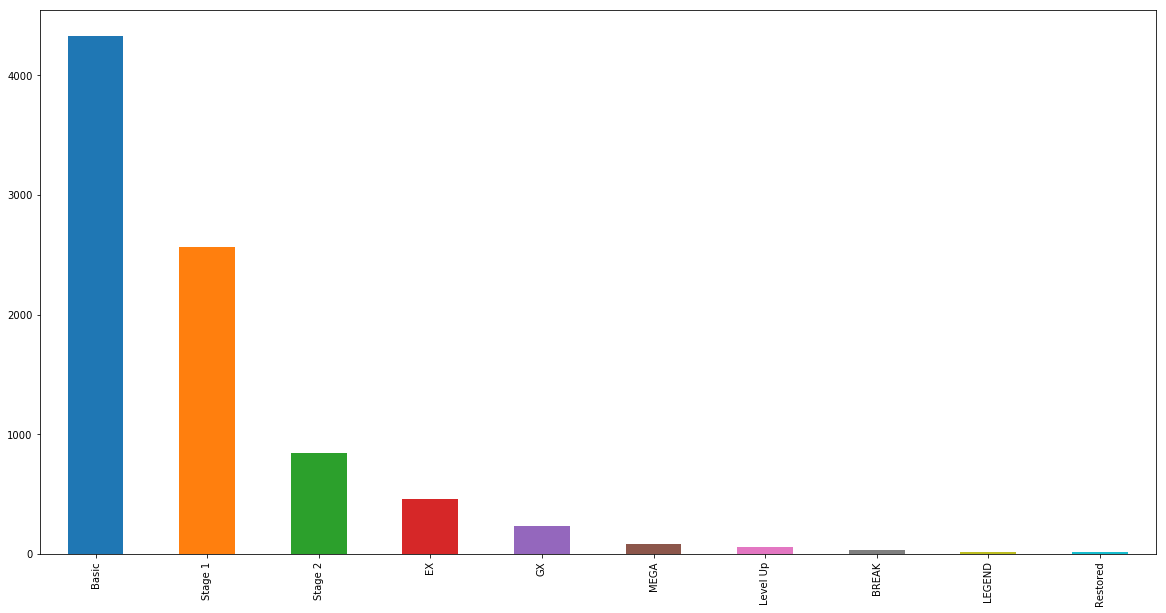

In [7]:
cards.Subtype.value_counts().plot(kind='bar')

## Types

In the database, Types refers to the property type of Pokémon. A Pokémon can have either one or two types. So, we'll need to account for that.

In [8]:
cards.Types.unique()

array(["['Lightning']", "['Grass']", "['Water']", "['Fire']", "['Metal']",
       "['Fighting']", "['Colorless']", "['Psychic']", "['Darkness']",
       '[]', "['Fairy']", "['Dragon']", "['Fighting', 'Metal']",
       "['Lightning', 'Metal']", "['Fire', 'Metal']",
       "['Fire', 'Lightning']", "['Lightning', 'Water']",
       "['Water', 'Fire']", "['Darkness', 'Metal']", "['Grass', 'Metal']",
       "['Water', 'Metal']", "['Psychic', 'Metal']",
       "['Darkness', 'Psychic']", "['Lightning', 'Darkness']",
       "['Grass', 'Darkness']", "['Darkness', 'Darkness']",
       "['Psychic', 'Darkness']", "['Fighting', 'Darkness']",
       "['Water', 'Darkness']", "['Metal', 'Darkness']",
       "['Fire', 'Darkness']", "['Fire', 'Grass']", "['Fire', 'Water']",
       "['Lightning', 'Grass']", "['Metal', 'Fighting']",
       "['Fairy', 'Water']", "['Fairy', 'Psychic']",
       "['Water', 'Fighting']", "['Colorless', 'Psychic']"], dtype=object)

In [9]:
S = cards.Types.value_counts()
S

['Water']                    1308
['Grass']                    1274
['Colorless']                1190
['Psychic']                  1161
['Fighting']                  925
['Fire']                      767
['Lightning']                 710
['Darkness']                  440
['Metal']                     376
['Dragon']                    237
['Fairy']                     145
['Grass', 'Darkness']          10
['Lightning', 'Metal']          9
['Fighting', 'Darkness']        8
['Water', 'Darkness']           7
['Water', 'Metal']              7
['Fire', 'Metal']               6
['Darkness', 'Metal']           6
['Psychic', 'Metal']            5
['Lightning', 'Darkness']       5
['Fighting', 'Metal']           4
['Fire', 'Darkness']            4
['Psychic', 'Darkness']         3
['Fire', 'Water']               3
['Grass', 'Metal']              3
['Metal', 'Fighting']           2
['Darkness', 'Psychic']         2
['Water', 'Fire']               2
['Fire', 'Lightning']           2
['Colorless', 

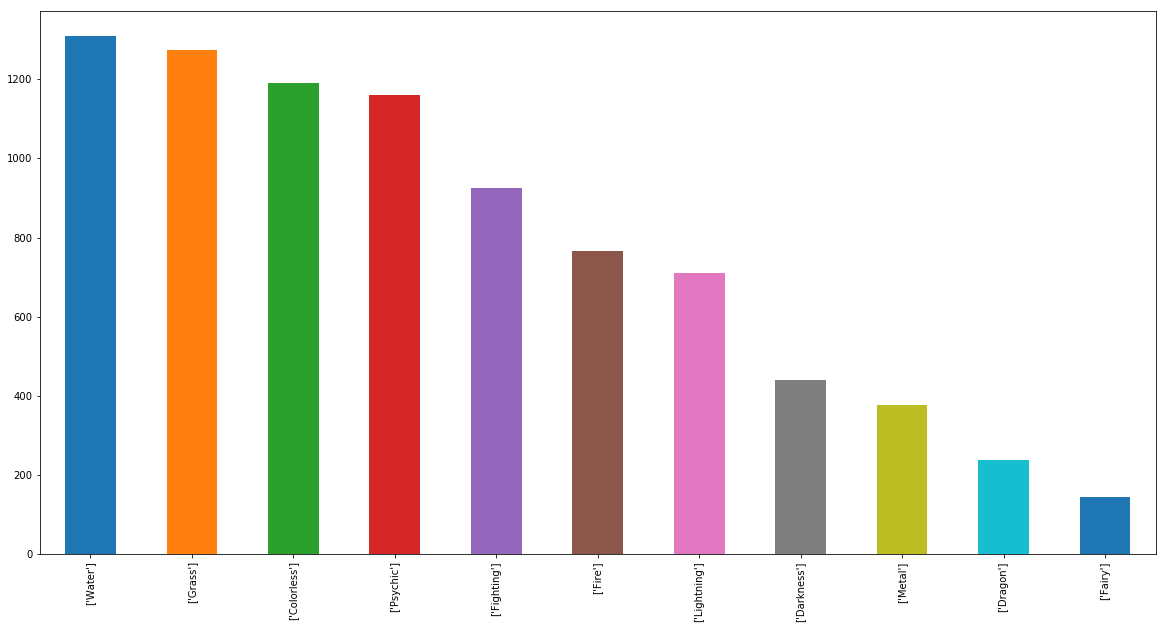

In [10]:
# Since the Pokémon that are two types are relatively fewer in count, for better visualization, let's only plot
# those that are greater than 10 count:
S[S > 10].plot(kind='bar')

## The strongest card

What if we want to figure out the strongest card? We could look at things like HP and attacks:

Which card has the most HP? What about most HP and the most Attacks?

In [11]:
cards[['ID', 'Name', 'HP', 'AttackCount', 'Subtype', 'Types']].nlargest(30, ['HP', 'AttackCount'])

,ID,Name,HP,AttackCount,Subtype,Types
4856,smp-SM38,Incineroar-GX,250.0,3,GX,['Fire']
4857,smp-SM39,Primarina-GX,250.0,3,GX,['Water']
4878,smp-SM60,Charizard-GX,250.0,3,GX,['Fire']
5436,sm4-34,Alolan Golem-GX,250.0,3,GX,['Lightning']
5495,sm4-102,Alolan Golem-GX,250.0,3,GX,['Lightning']
5503,sm4-113,Alolan Golem-GX,250.0,3,GX,['Lightning']
5902,sm3-20,Charizard-GX,250.0,3,GX,['Fire']
5946,sm3-64,Machamp-GX,250.0,3,GX,['Fighting']
6000,sm3-135,Machamp-GX,250.0,3,GX,['Fighting']
6009,sm3-150,Charizard GX,250.0,3,GX,['Fire']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a13a62588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1e291898>]], dtype=object)

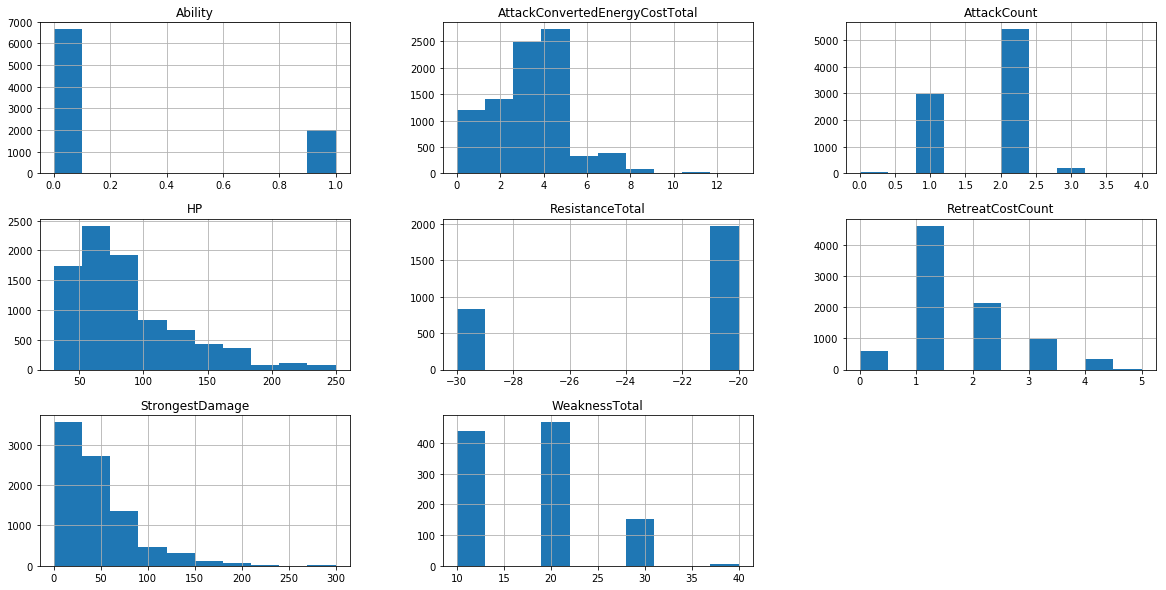

In [12]:
cards.hist(figsize=(20,10))

Subtype
BREAK       [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
Basic       [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
EX          [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
GX          [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
LEGEND      [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
Level Up    [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
MEGA        [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
Restored    [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
Stage 1     [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
Stage 2     [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
dtype: object

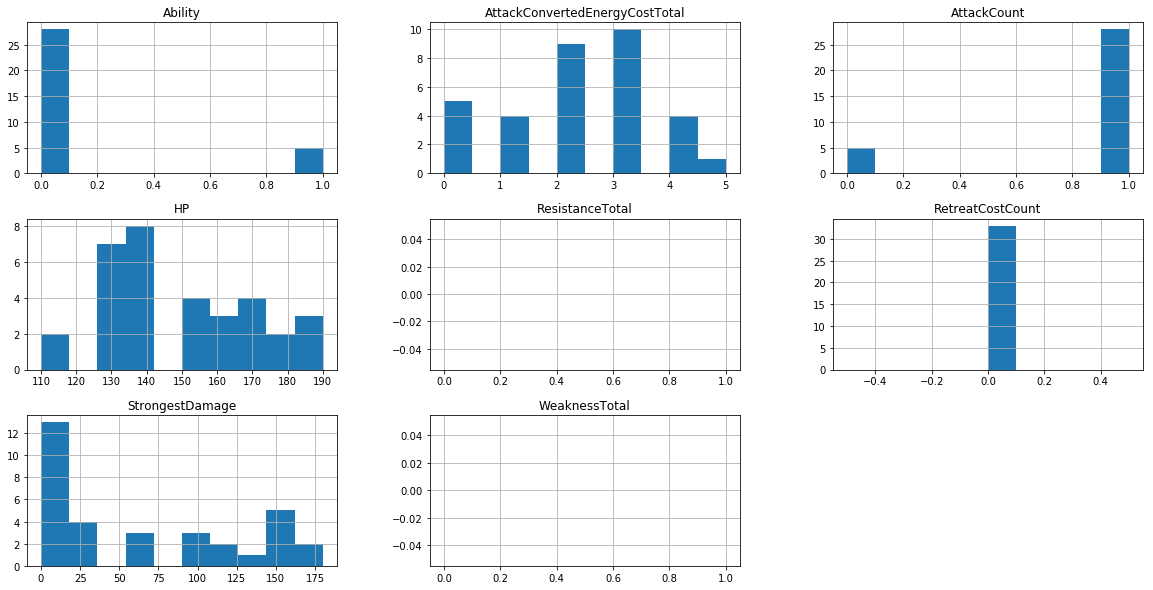

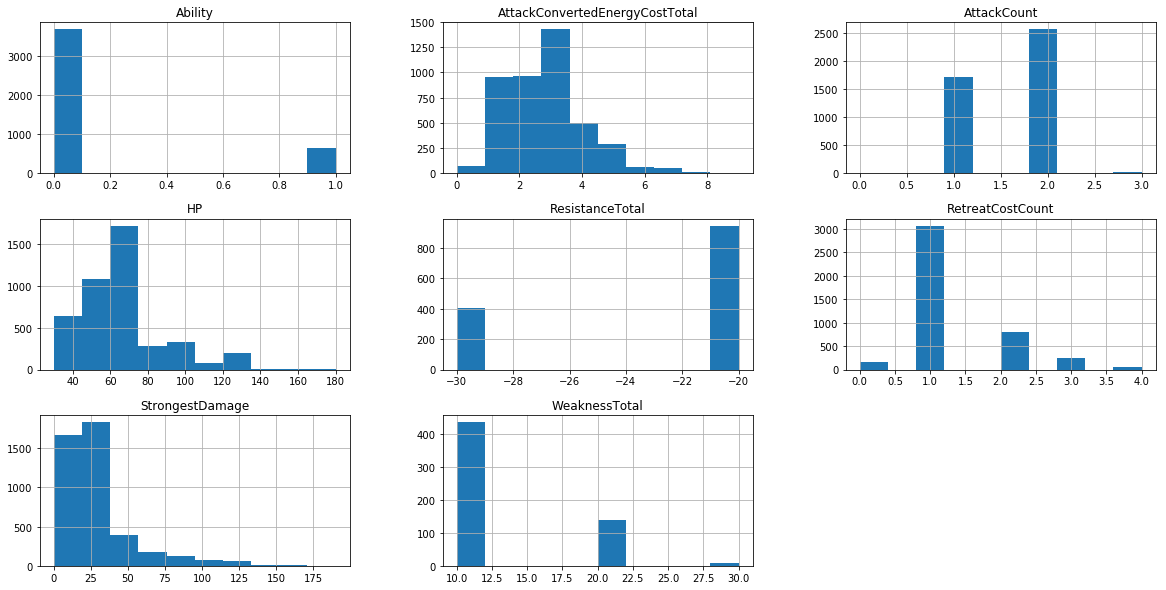

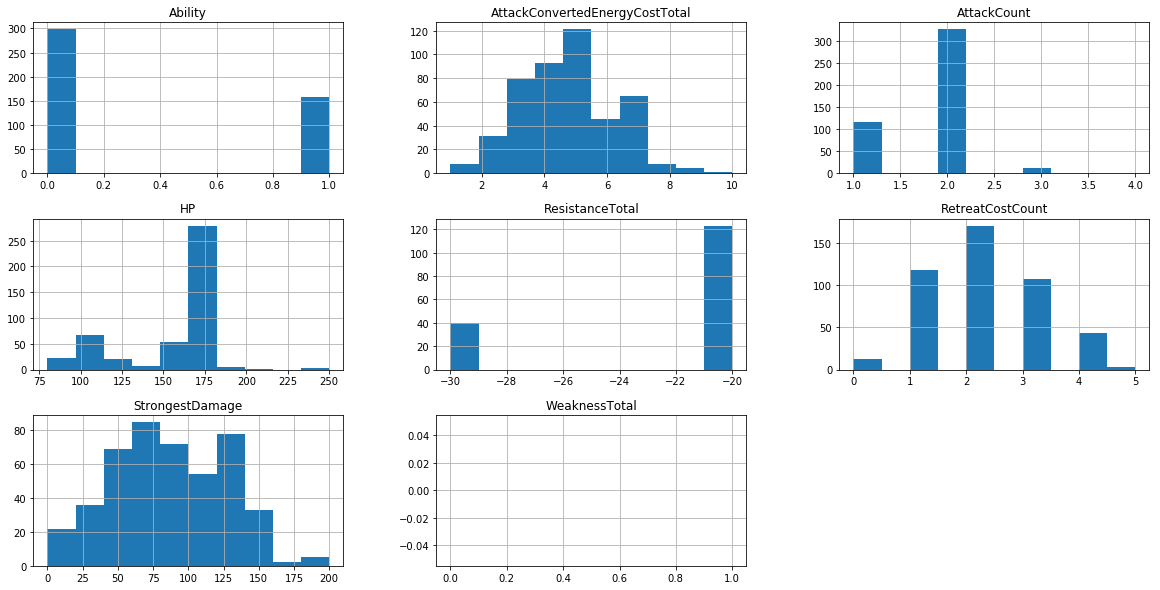

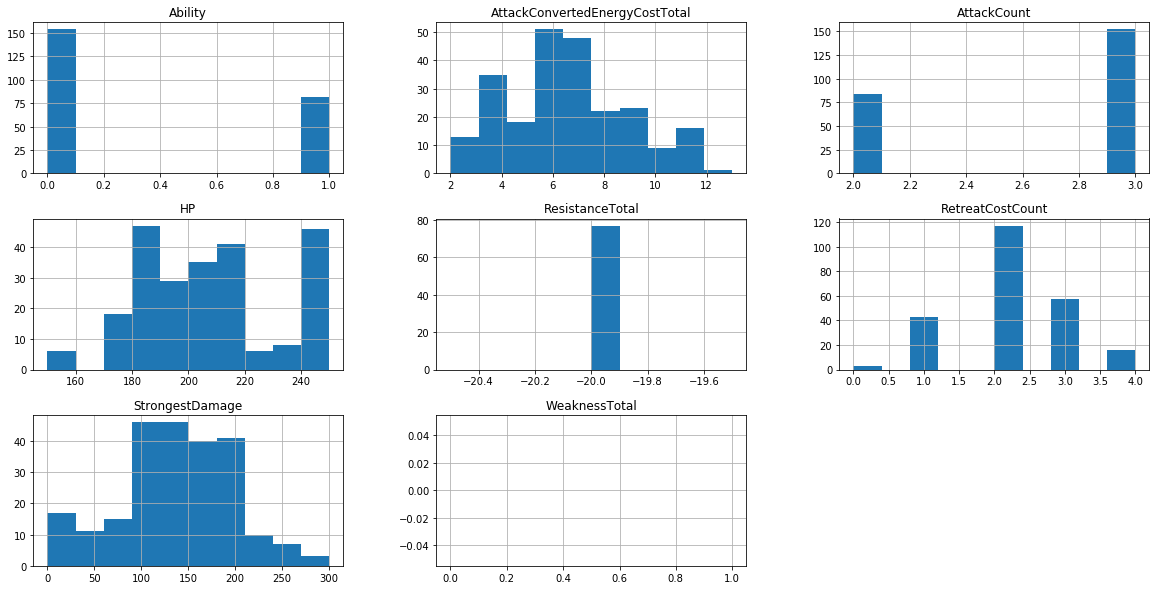

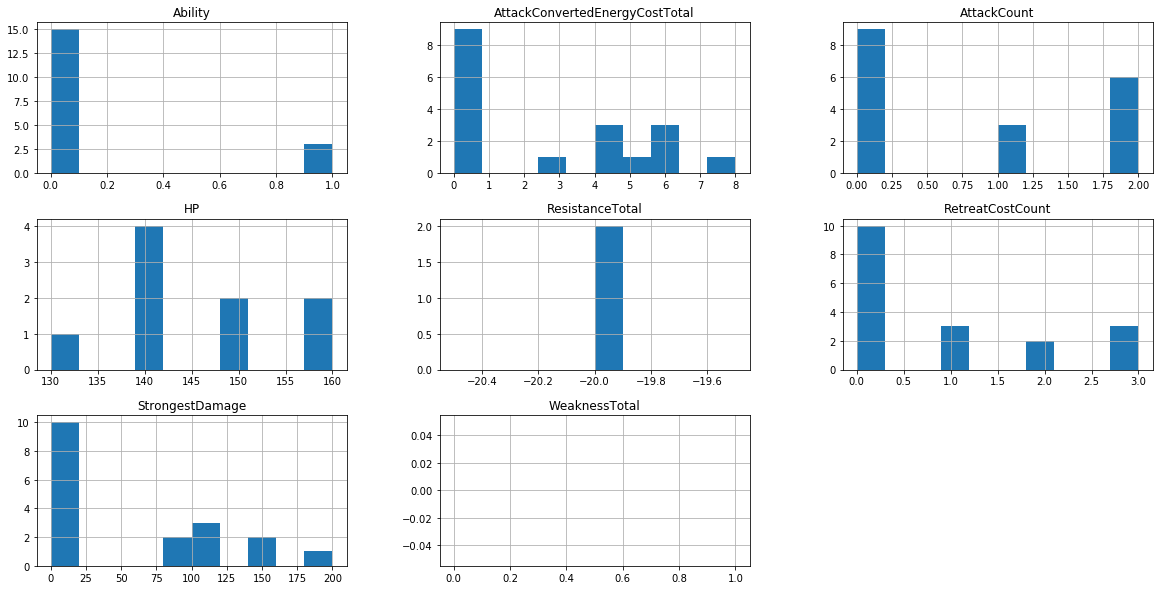

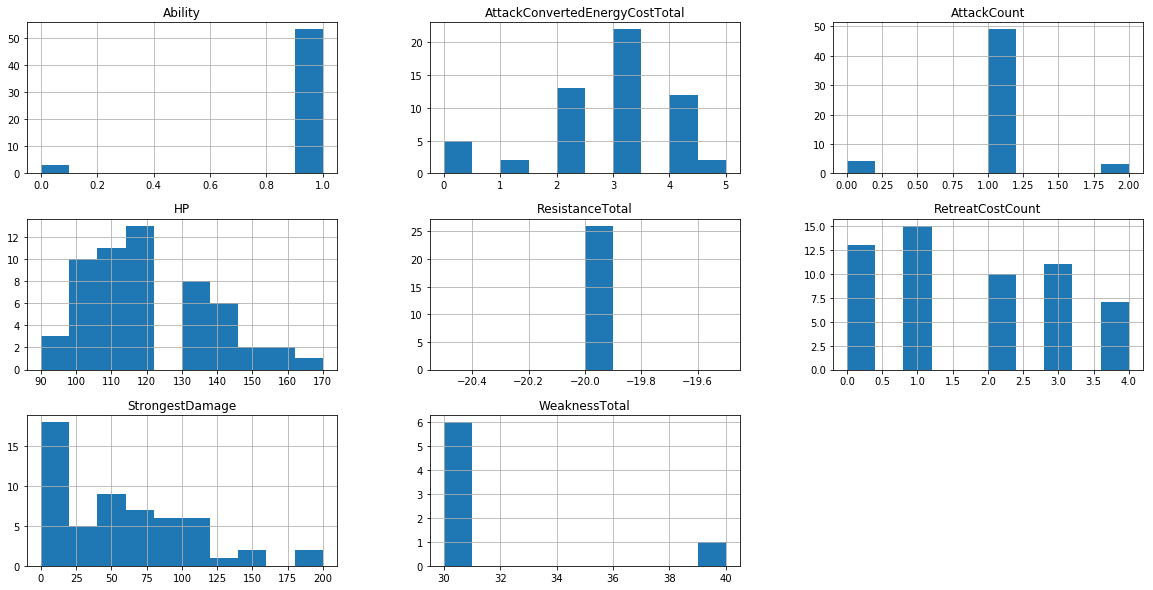

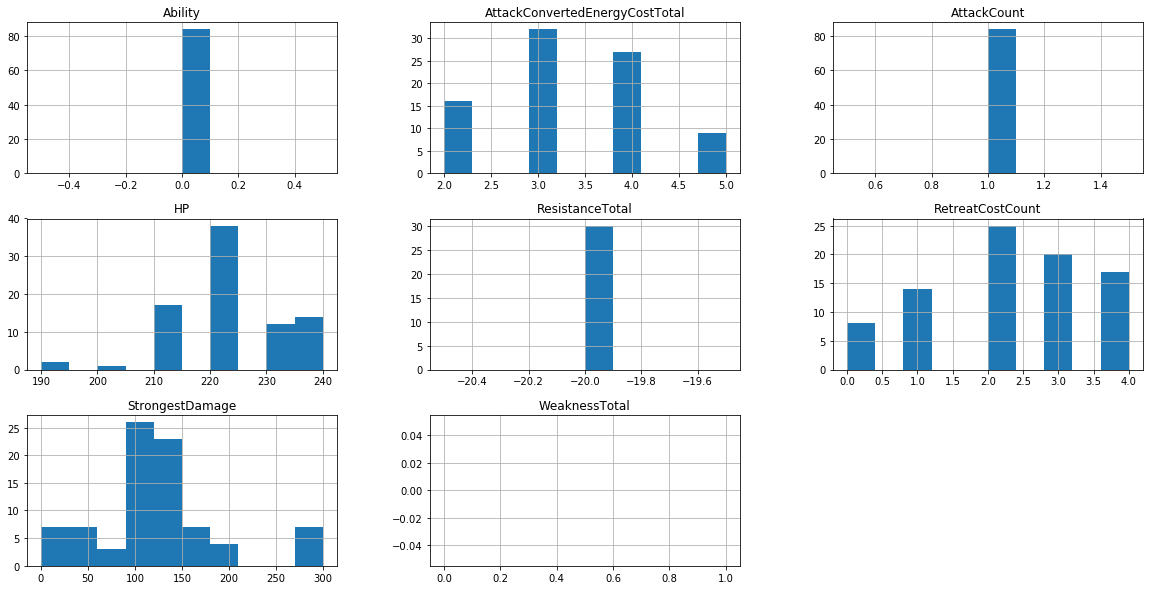

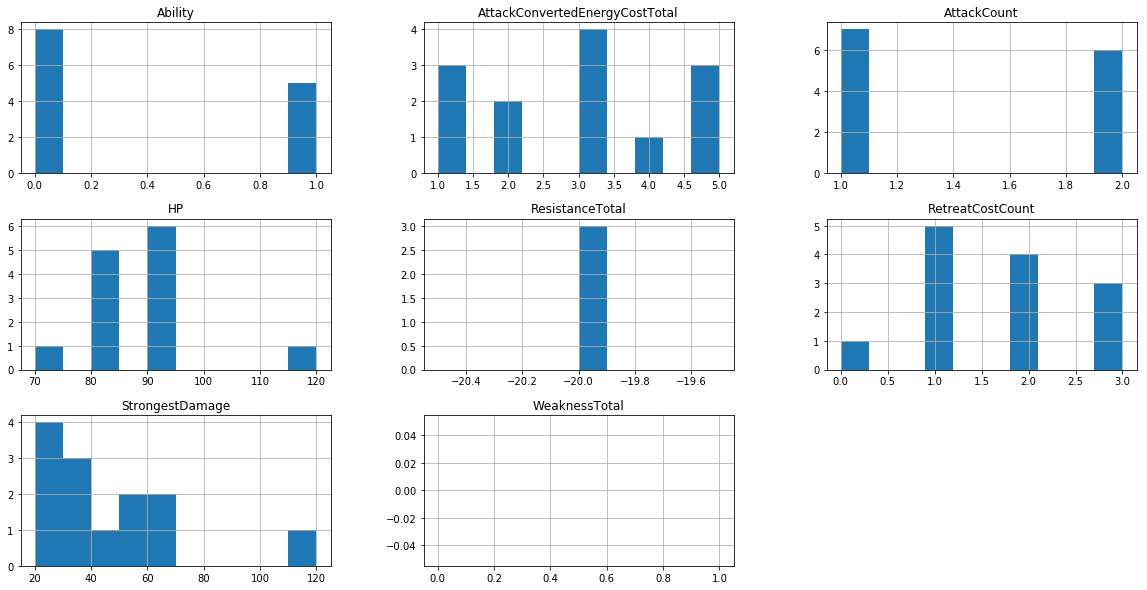

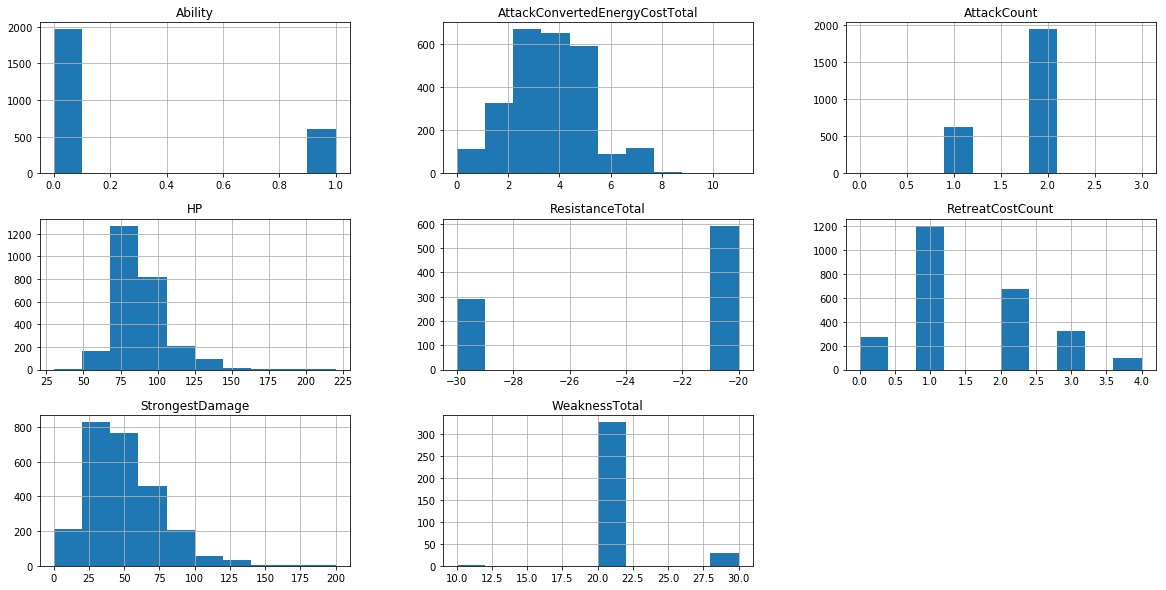

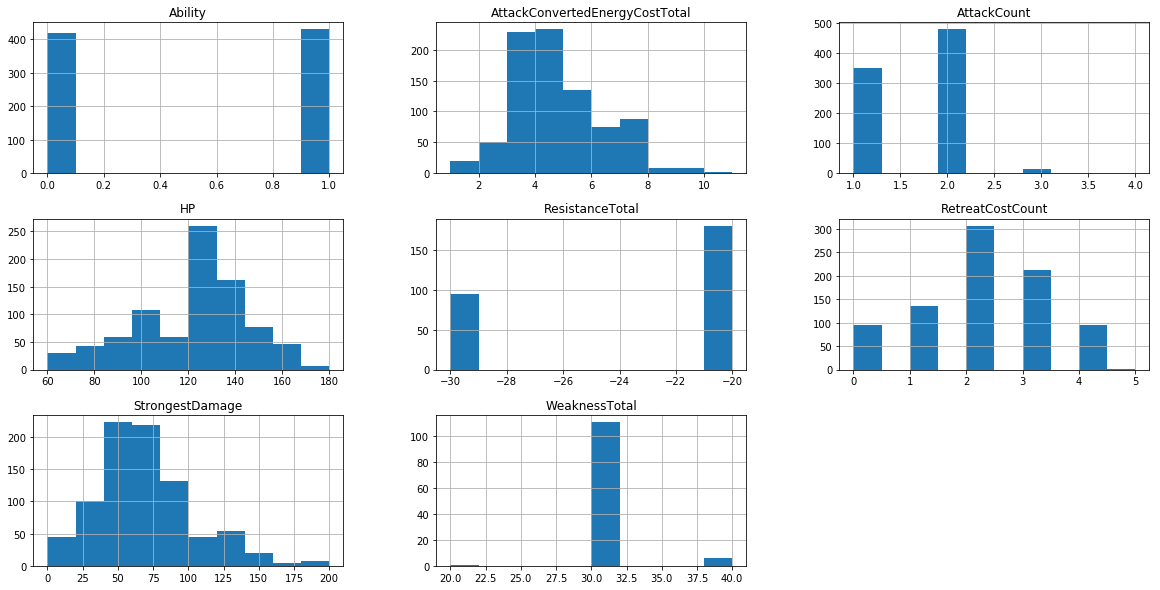

In [13]:
# look at these histograms by Subtype
cards.groupby('Subtype').hist(figsize=(20,10))

In [14]:
list(cards.groupby('Subtype'))

[('BREAK',
               ID              Name     HP  RetreatCostCount  AttackCount  \
  1203    xy10-14     Delphox BREAK  180.0                 0            0   
  1208    xy10-19     Omastar BREAK  140.0                 0            0   
  1241    xy10-51     Carbink BREAK  110.0                 0            1   
  1253    xy10-62    Bronzong BREAK  130.0                 0            1   
  1270    xy10-79       Lugia BREAK  150.0                 0            1   
  1812     xy8-12  Chesnaught BREAK  190.0                 0            1   
  1850     xy8-50      Raichu BREAK  130.0                 0            1   
  1879     xy8-79     Marowak BREAK  140.0                 0            1   
  1892     xy8-92     Zoroark BREAK  140.0                 0            1   
  1904    xy8-104     Florges BREAK  140.0                 0            0   
  1913    xy8-113     Noivern BREAK  130.0                 0            1   
  3638     xy9-18     Golduck BREAK  140.0                 0     

In [15]:
cards.groupby('Subtype').HP.describe()

,count,mean,std,min,25%,50%,75%,max
Subtype,,,,,,,,
BREAK,33.0,149.696970,21.863904,110.0,130.0,140.0,170.0,190.0
Basic,4326.0,63.689320,22.005351,30.0,50.0,60.0,70.0,180.0
EX,456.0,155.899123,31.302542,80.0,140.0,170.0,180.0,250.0
GX,236.0,203.516949,26.367366,150.0,180.0,200.0,220.0,250.0
LEGEND,9.0,145.555556,10.137938,130.0,140.0,140.0,150.0,160.0
Level Up,56.0,119.821429,18.339334,90.0,110.0,120.0,130.0,170.0
MEGA,84.0,221.785714,11.211087,190.0,220.0,220.0,230.0,240.0
Restored,13.0,86.923077,11.821319,70.0,80.0,90.0,90.0,120.0
Stage 1,2568.0,85.767134,18.283240,30.0,70.0,80.0,90.0,220.0


In [16]:
cards.groupby(['Subtype','HP'])[['Subtype','HP']].count()

Subtype    HP
Subtype HP                  
BREAK   110.0        2     2
        130.0        7     7
        140.0        8     8
        150.0        4     4
        160.0        3     3
        170.0        4     4
        180.0        2     2
        190.0        3     3
Basic   30.0       138   138
        40.0       503   503
        50.0      1073  1073
        60.0      1102  1102
        70.0       612   612
        80.0       278   278
        90.0       206   206
        100.0      127   127
        110.0       81    81
        120.0       89    89
        130.0      103   103
        140.0        3     3
        150.0        2     2
        160.0        7     7
        170.0        1     1
        180.0        1     1
EX      80.0         5     5
        90.0        18    18
        100.0       38    38
        110.0       28    28
        120.0       13    13
        130.0        7     7
...                ...   ...
Stage 1 50.0        20    20
        60.0       144   144
        70.0       527   527
        80.0       742   742
        90.0       567   567
        100.0      248   248
        110.0      123   123
        120.0       84    84
        130.0       74    74
        140.0       15    15
        150.0        6     6
        160.0        3     3
        180.0        2     2
        190.0        1     1
        200.0        3     3
        210.0        1     1
        220.0        1     1
Stage 2 60.0         7     7
        70.0        22    22
        80.0        43    43
        90.0        58    58
        100.0      107   107
        110.0       58    58
        120.0      122   122
        130.0      138   138
        140.0      161   161
        150.0       77    77
        160.0       47    47
        170.0        4     4
        180.0        3     3

[103 rows x 2 columns]

In [17]:
cards.groupby(["Subtype", "HP"]).size().reset_index(name='count')

,Subtype,HP,count
0,BREAK,110.0,2
1,BREAK,130.0,7
2,BREAK,140.0,8
3,BREAK,150.0,4
4,BREAK,160.0,3
5,BREAK,170.0,4
6,BREAK,180.0,2
7,BREAK,190.0,3
8,Basic,30.0,138
9,Basic,40.0,503


Subtype
BREAK       Axes(0.125,0.125;0.775x0.755)
Basic       Axes(0.125,0.125;0.775x0.755)
EX          Axes(0.125,0.125;0.775x0.755)
GX          Axes(0.125,0.125;0.775x0.755)
LEGEND      Axes(0.125,0.125;0.775x0.755)
Level Up    Axes(0.125,0.125;0.775x0.755)
MEGA        Axes(0.125,0.125;0.775x0.755)
Restored    Axes(0.125,0.125;0.775x0.755)
Stage 1     Axes(0.125,0.125;0.775x0.755)
Stage 2     Axes(0.125,0.125;0.775x0.755)
Name: HP, dtype: object

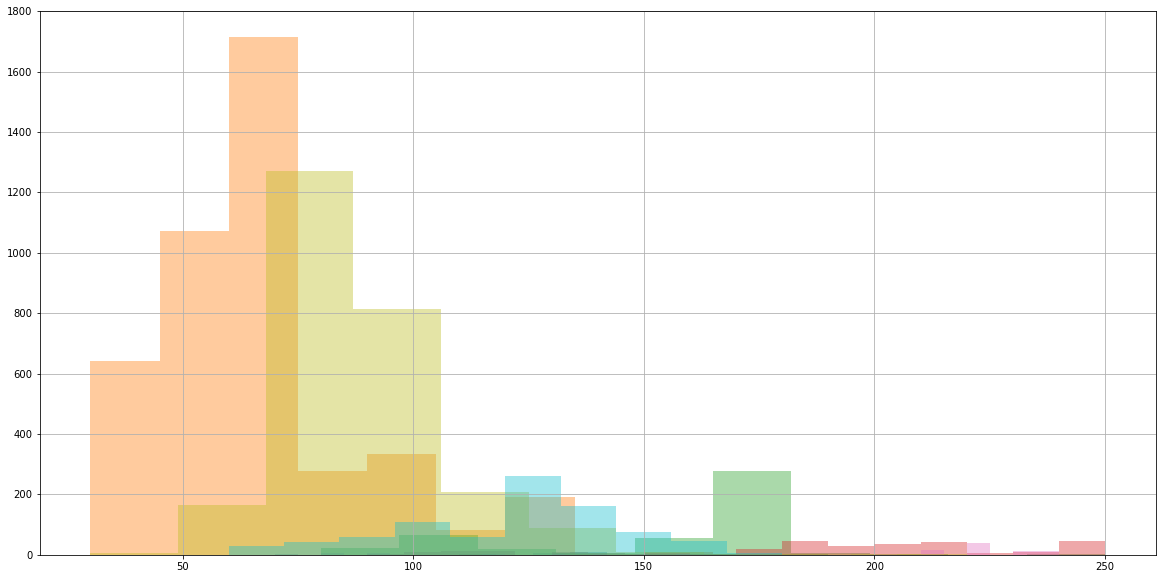

In [18]:
# let's drill into HP by Subtype
cards.groupby('Subtype').HP.hist(alpha=0.4)

In [19]:
# use Pearson's correlation to check for any relationships
correlation = cards.corr()
correlation

,HP,RetreatCostCount,AttackCount,AttackConvertedEnergyCostTotal,WeaknessTotal,ResistanceTotal,Ability,StrongestDamage
HP,1.000000,0.504006,0.189280,0.562151,0.910751,0.312821,0.126334,0.765300
RetreatCostCount,0.504006,1.000000,0.096452,0.473675,0.371524,0.129787,0.055509,0.444557
AttackCount,0.189280,0.096452,1.000000,0.650640,0.004930,0.043419,-0.496297,0.280341
AttackConvertedEnergyCostTotal,0.562151,0.473675,0.650640,1.000000,0.556580,-0.008943,-0.169737,0.658782
WeaknessTotal,0.910751,0.371524,0.004930,0.556580,1.000000,NaN,0.270528,0.672532
ResistanceTotal,0.312821,0.129787,0.043419,-0.008943,NaN,1.000000,-0.055955,0.267251
Ability,0.126334,0.055509,-0.496297,-0.169737,0.270528,-0.055955,1.000000,0.027650
StrongestDamage,0.765300,0.444557,0.280341,0.658782,0.672532,0.267251,0.027650,1.000000


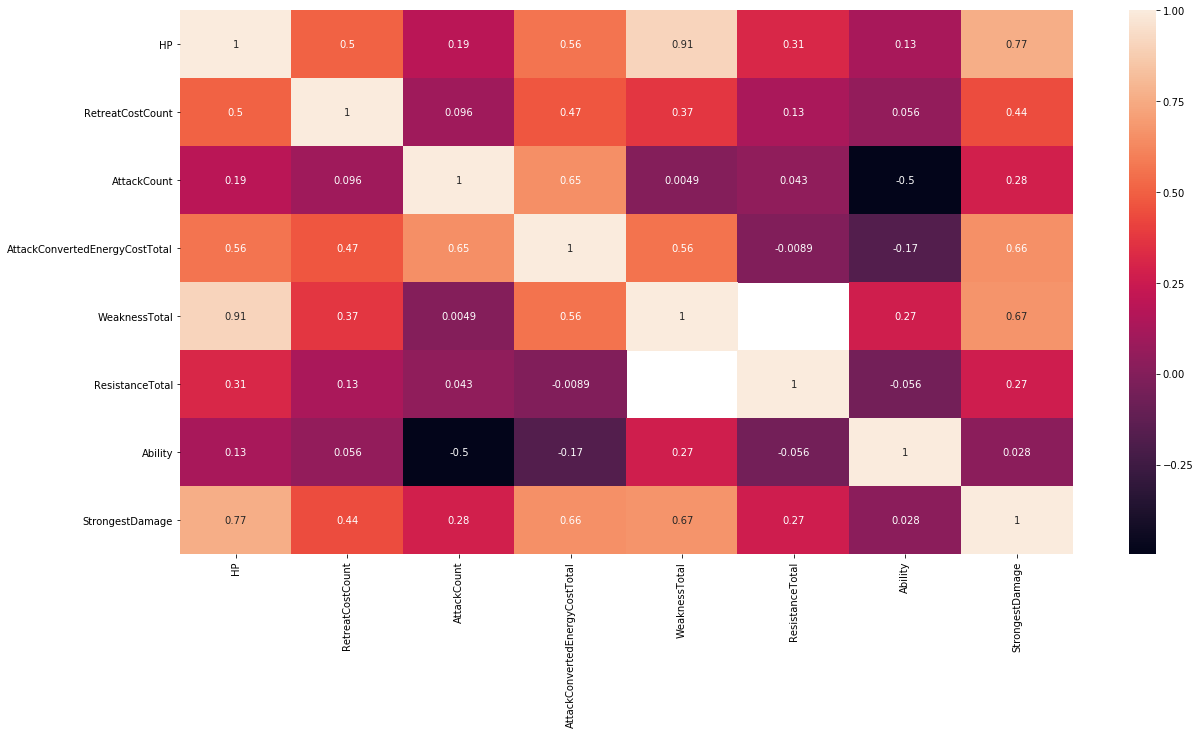

In [20]:
# this is better visualized with a heatmap
seaborn.heatmap(correlation, annot = True)